In [1]:
data_path = '/content/drive/MyDrive/Finale/'

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

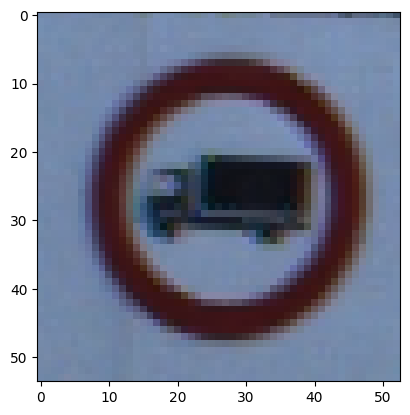

In [62]:
fimg = cv2.imread('/content/drive/MyDrive/Finale/Test/00000.png')
fimg = cv2.cvtColor(fimg, cv2.COLOR_BGR2RGB)
plt.imshow(fimg)

In [99]:
data=[]
labels=[]

height = 28
width = 28
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = f"/content/drive/MyDrive/Finale/Train/{i}/"
    # /content/drive/MyDrive/Finale/Train/0
    print(path)
    class_ = os.listdir(path)
    for a in class_:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

/content/drive/MyDrive/Finale/Train/0/
/content/drive/MyDrive/Finale/Train/1/
/content/drive/MyDrive/Finale/Train/2/
/content/drive/MyDrive/Finale/Train/3/
/content/drive/MyDrive/Finale/Train/4/
/content/drive/MyDrive/Finale/Train/5/
/content/drive/MyDrive/Finale/Train/6/
/content/drive/MyDrive/Finale/Train/7/
/content/drive/MyDrive/Finale/Train/8/
/content/drive/MyDrive/Finale/Train/9/
/content/drive/MyDrive/Finale/Train/10/
/content/drive/MyDrive/Finale/Train/11/
/content/drive/MyDrive/Finale/Train/12/
/content/drive/MyDrive/Finale/Train/13/
/content/drive/MyDrive/Finale/Train/14/
/content/drive/MyDrive/Finale/Train/15/
/content/drive/MyDrive/Finale/Train/16/
/content/drive/MyDrive/Finale/Train/17/
/content/drive/MyDrive/Finale/Train/18/
/content/drive/MyDrive/Finale/Train/19/
/content/drive/MyDrive/Finale/Train/20/
/content/drive/MyDrive/Finale/Train/21/
/content/drive/MyDrive/Finale/Train/22/
/content/drive/MyDrive/Finale/Train/23/
/content/drive/MyDrive/Finale/Train/24/
/content/d

In [100]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [117]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        2432      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 12, 12, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        18496     
                                                      

In [118]:
epochs = 10
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=epochs,
                    validation_data=(X_val, y_val))

Epoch 1/10
981/981 [==============================] - 16s 11ms/step - loss: 1.4386 - accuracy: 0.5987 - val_loss: 0.3182 - val_accuracy: 0.9140
Epoch 2/10
981/981 [==============================] - 18s 19ms/step - loss: 0.3604 - accuracy: 0.8935 - val_loss: 0.1552 - val_accuracy: 0.9586
Epoch 3/10
981/981 [==============================] - 10s 10ms/step - loss: 0.2044 - accuracy: 0.9397 - val_loss: 0.0967 - val_accuracy: 0.9759
Epoch 4/10
981/981 [==============================] - 10s 10ms/step - loss: 0.1628 - accuracy: 0.9502 - val_loss: 0.0685 - val_accuracy: 0.9793
Epoch 5/10
981/981 [==============================] - 15s 15ms/step - loss: 0.1308 - accuracy: 0.9616 - val_loss: 0.0570 - val_accuracy: 0.9846
Epoch 6/10
981/981 [==============================] - 13s 13ms/step - loss: 0.1123 - accuracy: 0.9648 - val_loss: 0.0358 - val_accuracy: 0.9888
Epoch 7/10
981/981 [==============================] - 12s 12ms/step - loss: 0.1046 - accuracy: 0.9673 - val_loss: 0.0339 - val_accuracy:

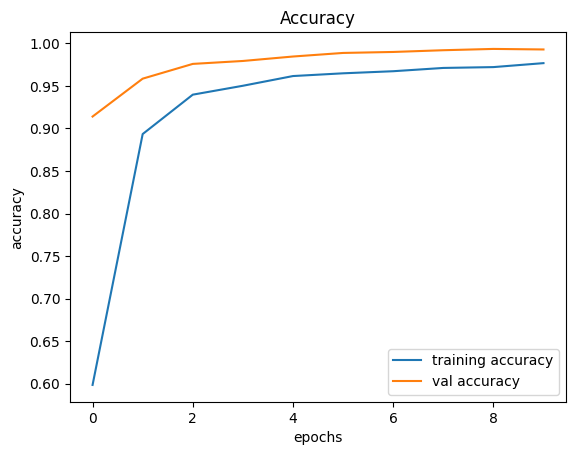

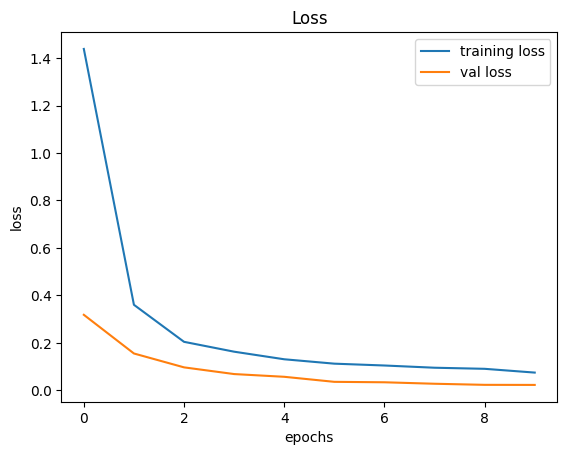

In [119]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [120]:
y_test=pd.read_csv('/content/drive/MyDrive/Finale/Test.csv')
# labels=y_test['Path'].as_matrix()
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('/content/drive/MyDrive/Finale/'+f)
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

In [122]:
model.save('/content/drive/MyDrive/Finale/traffic_sign_rec.h5')

In [123]:
from keras.models import load_model

X_test = np.array(data)
X_test = X_test.astype('float32')/255 

In [124]:
predict_x = model.predict(X_test)
pred = np.argmax(predict_x,axis=1)

395/395 [==============================] - 1s 2ms/step


In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9669833729216152

In [127]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        60
           1       0.98      1.00      0.99       720
           2       0.98      0.99      0.98       750
           3       0.99      0.94      0.97       450
           4       0.97      0.97      0.97       660
           5       0.95      0.97      0.96       630
           6       1.00      0.92      0.96       150
           7       1.00      0.91      0.95       450
           8       0.92      0.99      0.96       450
           9       0.98      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       1.00      0.96      0.98       420
          12       0.97      0.96      0.97       690
          13       1.00      0.99      1.00       720
          14       1.00      1.00      1.00       270
          15       0.92      1.00      0.96       210
          16       1.00      0.99      0.99       150
          17       1.00    

In [130]:
conf = confusion_matrix(y_test, pred)

[[ 59   1   0 ...   0   0   0]
 [  0 718   0 ...   0   0   0]
 [  0   3 742 ...   0   0   0]
 ...
 [  0   0   0 ...  87   0   0]
 [  0   0   0 ...   0  48   0]
 [  0   0   0 ...   0   1  89]]


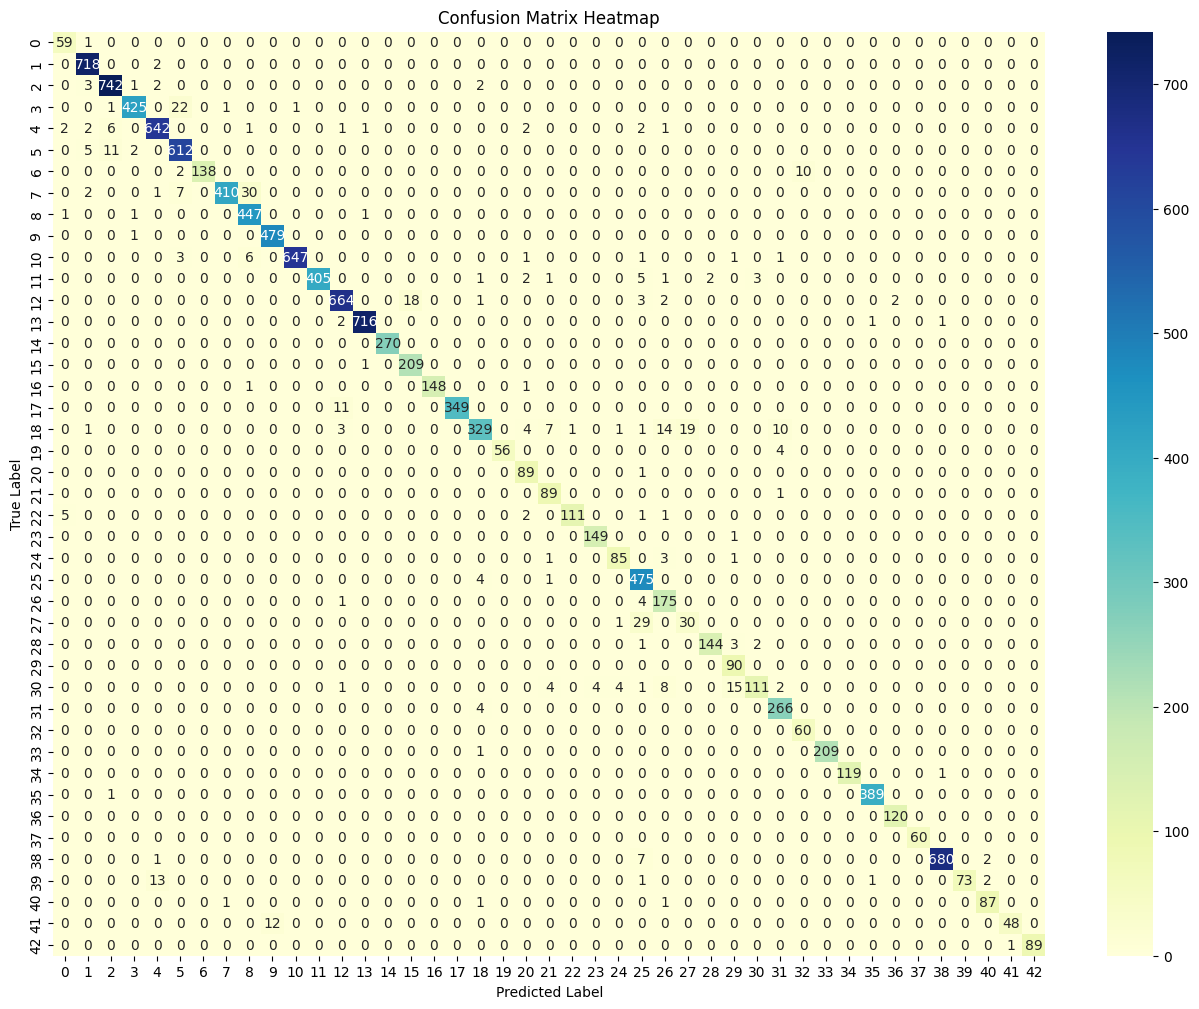

In [134]:
import seaborn as sns

plt.figure(figsize=(16, 12)) 
sns.heatmap(conf, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

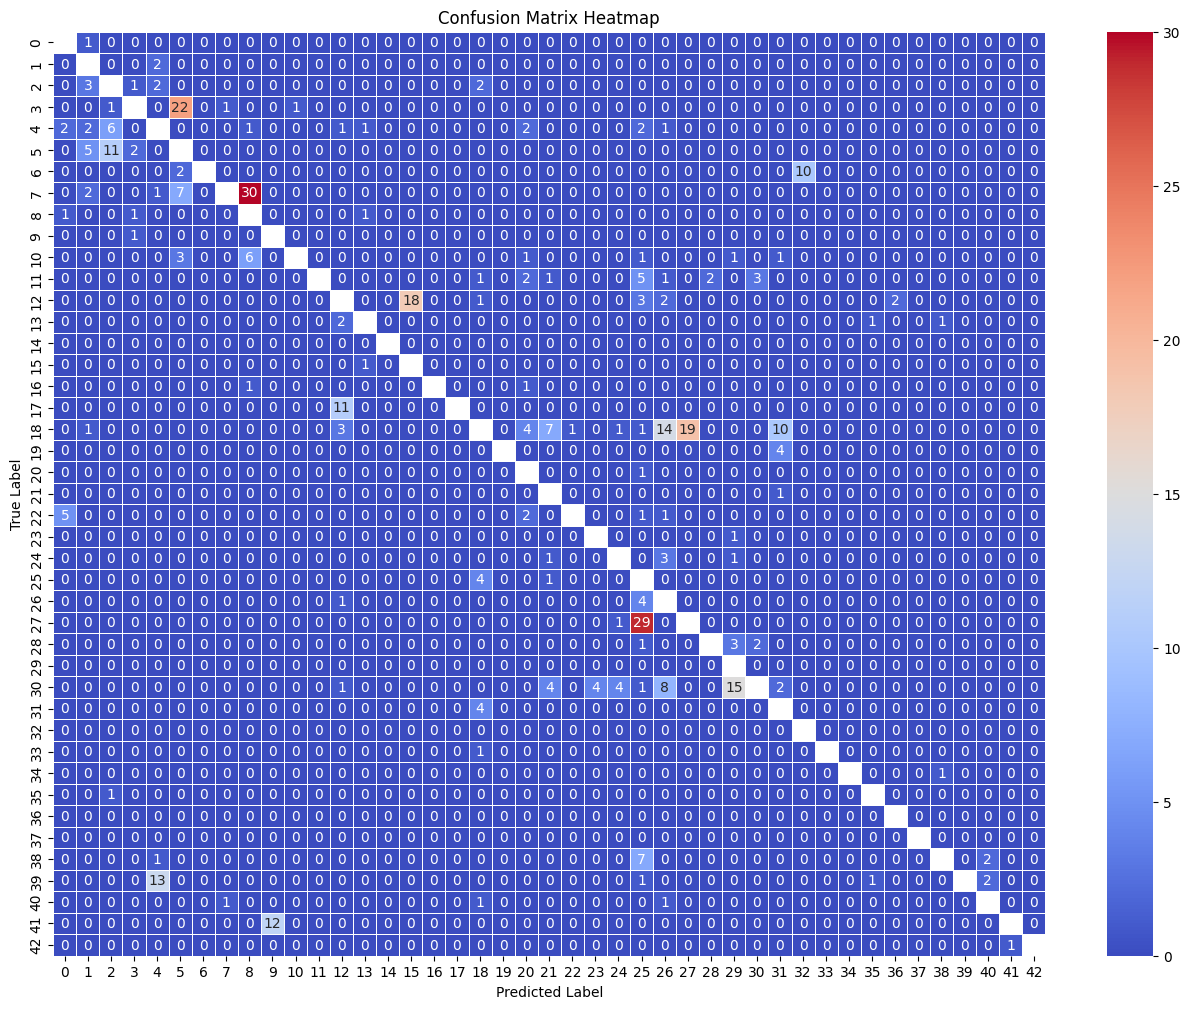

In [141]:
# Assuming you have a confusion matrix called `conf`
plt.figure(figsize=(16, 12)) # Adjust the figure size according to your matrix dimensions

# Create a boolean mask for diagonal elements
mask = np.eye(conf.shape[0], dtype=bool)

# Create the heatmap with the mask
# sns.heatmap(conf, annot=True, fmt="d", cmap="coolwarm_r", mask=mask, linewidths=0.5)
sns.heatmap(conf, annot=True, fmt="d", cmap="coolwarm", mask=mask, linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")


In [142]:
model.save('/content/drive/MyDrive/Finale/traffic_sign_rec10.h5')

In [144]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model_path = '/content/drive/MyDrive/Finale/traffic_sign_rec20.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

In [145]:
epochs = 10
new_history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, early_stop]
                    )

Epoch 1/10
976/981 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.9763
Epoch 1: val_accuracy improved from -inf to 0.99541, saving model to /content/drive/MyDrive/Finale/traffic_sign_rec20.h5
981/981 [==============================] - 11s 11ms/step - loss: 0.0777 - accuracy: 0.9762 - val_loss: 0.0181 - val_accuracy: 0.9954
Epoch 2/10
981/981 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.9799
Epoch 2: val_accuracy did not improve from 0.99541
981/981 [==============================] - 11s 11ms/step - loss: 0.0641 - accuracy: 0.9799 - val_loss: 0.0195 - val_accuracy: 0.9952
Epoch 3/10
980/981 [============================>.] - ETA: 0s - loss: 0.0673 - accuracy: 0.9796
Epoch 3: val_accuracy did not improve from 0.99541
981/981 [==============================] - 10s 10ms/step - loss: 0.0675 - accuracy: 0.9795 - val_loss: 0.0195 - val_accuracy: 0.9945
Epoch 4/10
978/981 [============================>.] - ETA: 0s - loss: 0.0575 - accuracy: 0

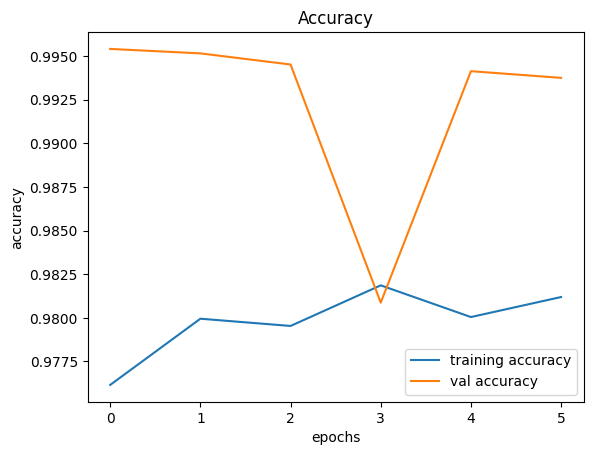

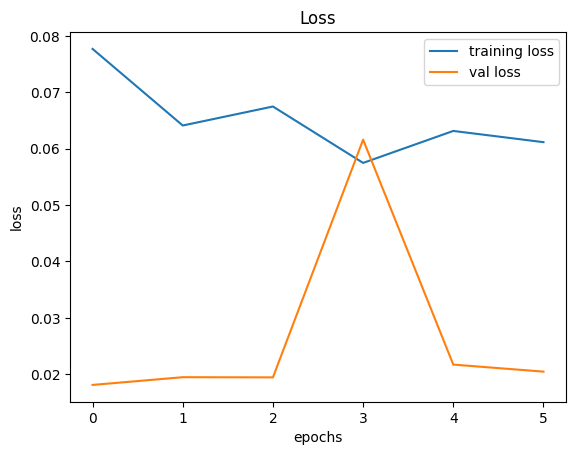

In [146]:
plt.figure(0)
plt.plot(new_history.history['accuracy'], label='training accuracy')
plt.plot(new_history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(new_history.history['loss'], label='training loss')
plt.plot(new_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [149]:
model = load_model('/content/drive/MyDrive/Finale/traffic_sign_rec20.h5')
predict_x = model.predict(X_test)
pred = np.argmax(predict_x,axis=1)

395/395 [==============================] - 1s 2ms/step


In [150]:
accuracy_score(y_test, pred)

0.9703087885985748

In [151]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.98      1.00      0.99       720
           2       0.96      1.00      0.98       750
           3       0.99      0.94      0.96       450
           4       0.99      0.98      0.98       660
           5       0.93      0.97      0.95       630
           6       1.00      0.89      0.94       150
           7       0.99      0.96      0.97       450
           8       0.96      0.98      0.97       450
           9       0.96      0.99      0.98       480
          10       1.00      0.98      0.99       660
          11       0.98      0.97      0.98       420
          12       0.99      0.97      0.98       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.94      1.00      0.97       210
          16       0.97      1.00      0.99       150
          17       1.00    

In [152]:
conf_m = confusion_matrix(y_test, pred)

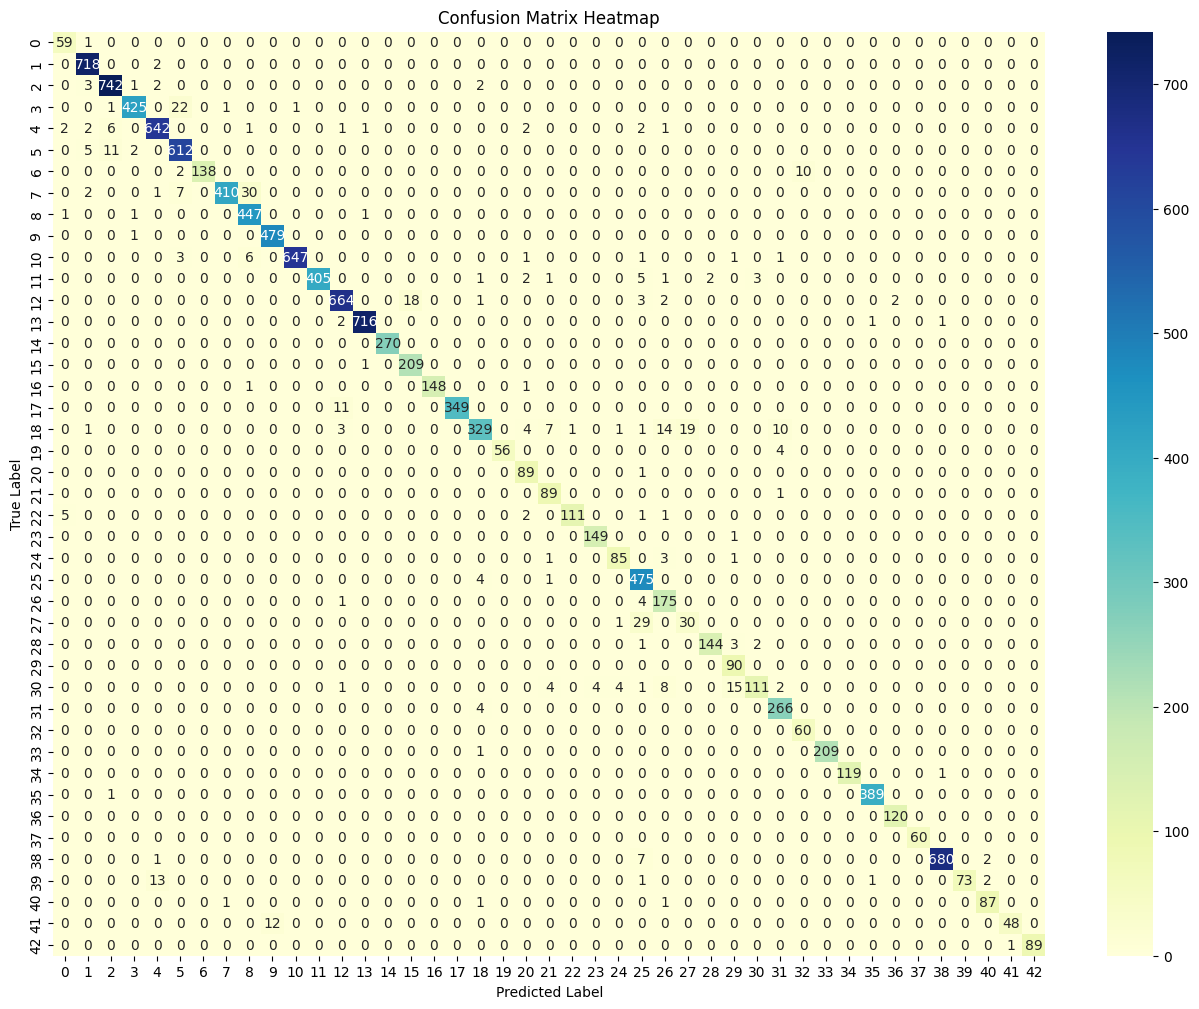

In [153]:
plt.figure(figsize=(16, 12)) 
sns.heatmap(conf, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

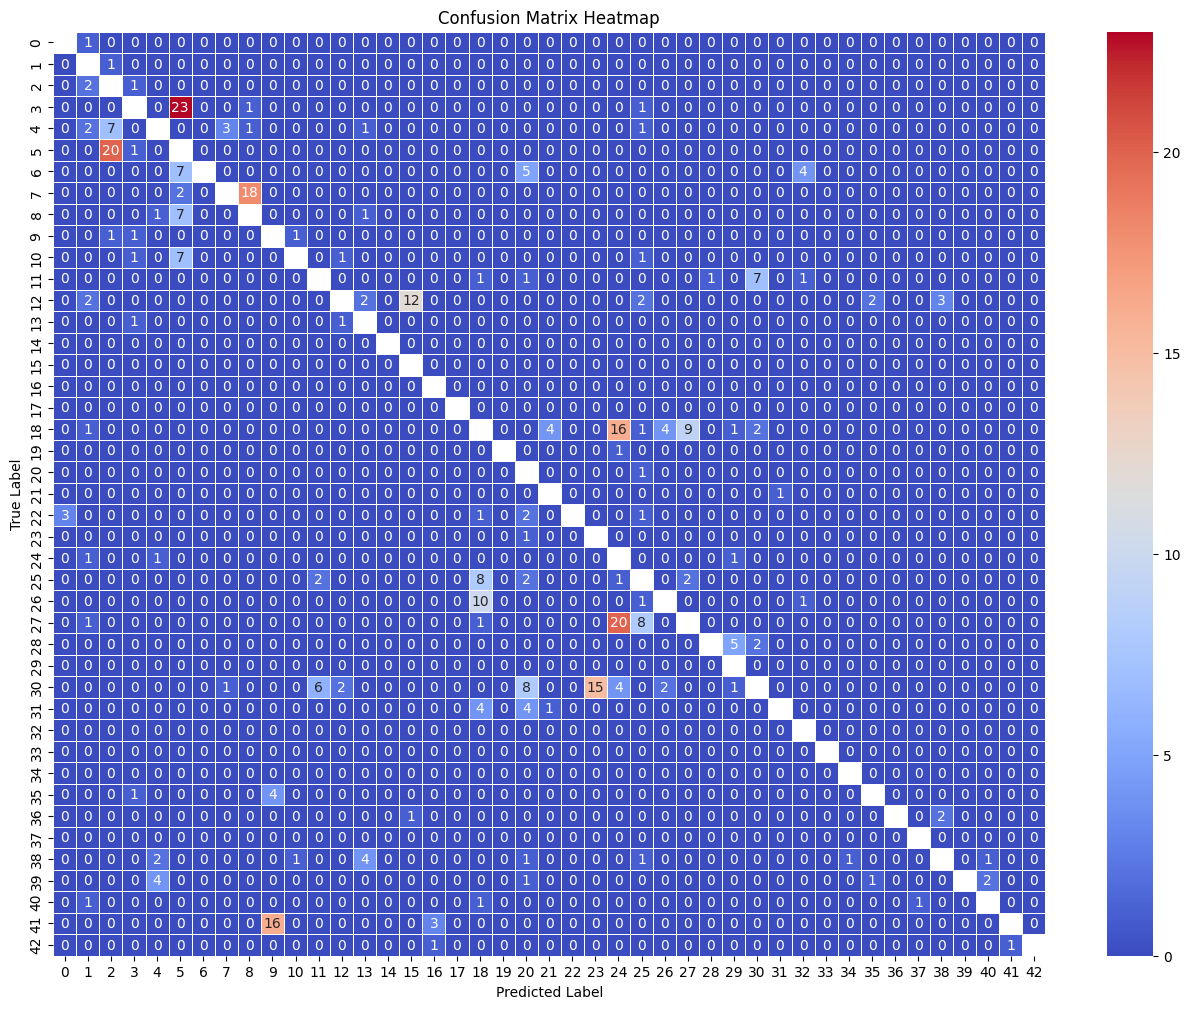

In [154]:
# Assuming you have a confusion matrix called `conf`
plt.figure(figsize=(16, 12)) # Adjust the figure size according to your matrix dimensions

# Create a boolean mask for diagonal elements
mask = np.eye(conf.shape[0], dtype=bool)

# Create the heatmap with the mask
# sns.heatmap(conf, annot=True, fmt="d", cmap="coolwarm_r", mask=mask, linewidths=0.5)
sns.heatmap(conf_m, annot=True, fmt="d", cmap="coolwarm", mask=mask, linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")